In [74]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("framingham.csv")
df.drop(["education"], axis=1, inplace=True) # Remove 'education' column
df.dropna(inplace=True) # Drop rows with missing values

df["male"] = df["male"].astype(int) # Convert 'male' column to integer
df["TenYearCHD"] = df["TenYearCHD"].astype(int) # Convert 'TenYearCHD' column to integer

full_data = df.values.tolist()
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [75]:
full_data = np.matrix(full_data) # convertir los datos a una matriz

epoch = 150000
alpha = 0.001

x0 = np.ones((full_data.shape[0], 1)) # Crear columna de unos

data = np.concatenate((x0, full_data), axis=1) # Concatenar la columna de unos con los datos

print(data.shape)
theta = np.zeros((1, data.shape[1]-1))
print(theta.shape)
print(theta)

(3749, 16)
(1, 15)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [76]:
#Crear eel train y test 
test_size=0.2
X_train=data[:-int(test_size*len(full_data)),:-1]
Y_train=data[:-int(test_size*len(full_data)),-1]
X_test=data[-int(test_size*len(full_data)):,:-1]
Y_test=data[-int(test_size*len(full_data)):,-1]

In [77]:
#Funcion de la sigmoide

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def BCE(X, y, theta):
    pred = sigmoid(np.dot(X, theta.T))
    mcost = -np.array(y).flatten() * np.log(pred) - np.array((1-y)).flatten() * np.log(1-pred)
    return mcost.mean()

In [78]:
#Funcion de gradiente

def grad_descent(X,y,theta,alpha):
    h=sigmoid(X.dot(theta.T))
    loss=h-y
    dj=(loss.T).dot(X)
    theta -= (alpha/(len(X))*dj)
    return theta
            
cost=BCE(X_train,Y_train,theta)
print("cost before: ",cost)
            
theta=grad_descent(X_train,Y_train,theta,alpha)
            
cost=BCE(X_train,Y_train,theta)
print("cost after: ",cost)

cost before:  2079.441541679836
cost after:  15635.549743499138


Cost function at epoch  1000 :  2789.1461973163414
Cost function at epoch  2000 :  24581.423791875408
Cost function at epoch  3000 :  20543.797553027413
Cost function at epoch  4000 :  23323.962902108906
Cost function at epoch  5000 :  13442.082665309674
Cost function at epoch  6000 :  22282.082471328
Cost function at epoch  7000 :  3739.2825531082362
Cost function at epoch  8000 :  2275.8153328768312
Cost function at epoch  9000 :  8718.900930093949
Cost function at epoch  10000 :  27387.498584113815
Cost function at epoch  11000 :  22305.924464257394
Cost function at epoch  12000 :  14285.741340051509
Cost function at epoch  13000 :  23174.769215015673
Cost function at epoch  14000 :  30543.616567470614
Cost function at epoch  15000 :  3907.4631404384168
Cost function at epoch  16000 :  15806.487944384058
Cost function at epoch  17000 :  5571.775735709087
Cost function at epoch  18000 :  5313.259070149685
Cost function at epoch  19000 :  23236.362759173535
Cost function at epoch  200

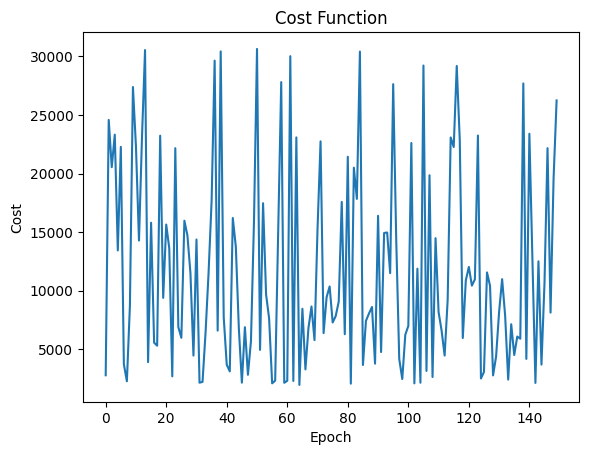

In [80]:
def logistic_reg(epoch, X, y, theta, alpha):
    costs = []
    for ep in range(epoch): # por cada iteracion 
        # update theta
        theta = grad_descent(X, y, theta, alpha)
        
        # calculate new loss
        if ((ep+1) % 1000 == 0):
            loss = BCE(X, y, theta)
            costs.append(loss)
            print("Cost function at epoch ", ep+1, ": ", loss)
            
    # graficar la funcion de costo
    plt.plot(costs)
    plt.title("Cost Function")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()
    
    return theta

theta = logistic_reg(epoch, X_train, Y_train, theta, alpha)

In [ ]:
#Probar el codigo

print(BCE(X_train,Y_train,theta))
print(BCE(X_test,Y_test,theta))

4067.266638498725
1118.0057557723944
